### Word Embeddings :
- In NLP, Word Embeddings term is used for the representaction of the words for text analysis, typically in the form of a real-values vector that encodes the meaning of word such that the words that are closer in the vector space are expected to be similar in meaning


Types :
    - frequency based like BOW, Tf-Idf
    - prediction based like Word2Vec

### Word2Vec :
- its  word embedding technique whos work `to convert word into vector`


- What's a different between BOW/Tf-Idf and Word2Vec :
    - able to find the semantic relation between words
    - low dimention vectors
    - dense vector means less `0` values in the vectors which means less chances of overfitting

In [1]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [6]:
!pip install gdown
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM --output GoogleNews-vectors-negative300.bin.gz

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=650e0fd5-4687-4670-8b77-561fbea6ecdb
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:15<00:00, 107MB/s] 


In [7]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [8]:
model['man']

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [10]:
model['man'].shape

(300,)

In [14]:
model.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [16]:
model.similarity('man', 'woman')

0.76640123

In [25]:
model.doesnt_match(['python','java','cricket'])

'cricket'

In [30]:
vec = model['king'] - model['kingdom'] + model['queen']
model.most_similar(vec)

[('queen', 0.8157808184623718),
 ('king', 0.6701233983039856),
 ('queens', 0.5944843292236328),
 ('kings', 0.52122962474823),
 ('princess', 0.5134062170982361),
 ('Queen', 0.46866825222969055),
 ('monarch', 0.46215540170669556),
 ('Eugene_Ionesco_absurdist_comedy', 0.44696709513664246),
 ('Queen_Consort', 0.43802714347839355),
 ('crowned_queen', 0.4340905547142029)]

### Types of Word2Vec :
- C (contineous) - BOW
- Strip Gram

If data is small then use C-BOW and if data is large then use skip-gram which is proven is lots of experiments


how to improve word2vec :
- increase training data
- increase dimensions of vectors (hidden layer)
- increase window size precisely

- **C (contineous) - BOW :**
    - perform nlp tasks such as language translation and text classification.
    - it predicts a target word based on the surrounding context words.
    - It takes a fixed-sized context window of words and tries to predict the target word in the middle of the window.
    - The model learns by maximizing the probability of predicting the target word correctly given the context words.

**Example :**

Let's say we have the document/corpus, "I eat Pizza on Friday". First, we will tokenize the sentence: ["I", "eat", "pizza","on", "Friday"]. Now, let's create the training examples for this sentence for the CBOW model, **considering** `a window size of 2`.

Training example 1: Input: ["I", "pizza"], Target: "eat".

Training example 2: Input: ["eat", "on"], Target: "pizza".

Training example 3: Input: ["pizza", "Friday"], Target:"on".

In CBOW, there are typically three main layers involved: the input layer, the hidden layer, and the output layer.

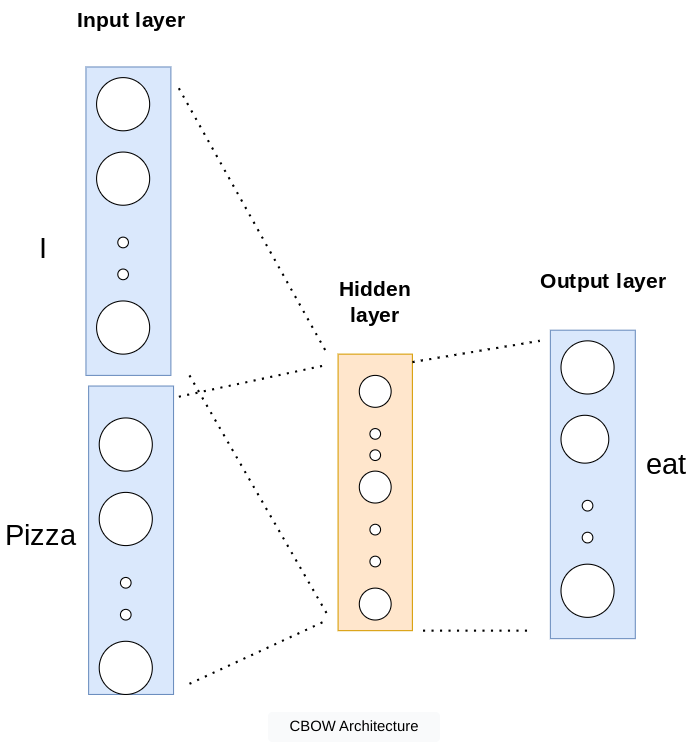


- **Skip-gram :**

Skip-gram is another neural network architecture used in Word2Vec that predicts the context of a word, given a target word. The input to the skip-gram model is a target word, while the output is a set of context words. The goal of the skip-gram model is to learn the probability distribution of the context words, given the target word.

During training, the skip-gram model is fed with a set of target words and their corresponding context words. The model learns to adjust the weights of the hidden layer to maximize the probability of predicting the correct context words, given the target word.

Let’s take a look at the same example discussed above.

Example :

The sentence was, "I eat Pizza on Friday". First, we will tokenize the sentence: ["I", "eat", "pizza", "on", "Friday"]. Now, let's create the training examples for this sentence for the skip-gram model, considering a window size of 2.

Training example 1: Input: "eat", Target: ["I", "pizza"].

Training example 2: Input: "pizza", Target: ["eat", "on"].

Training example 3: Input: "on", Target: ["pizza", "Friday"].

Training example 4: Input: "Friday", Target: ["on"].

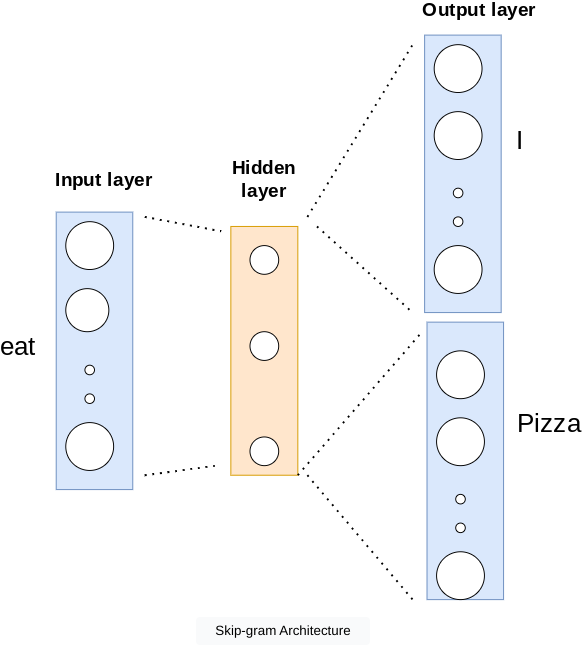

### Training custom model model :
https://www.kaggle.com/khulasasndh/game-of-thrones-books

In [34]:
import numpy as np
import pandas as pd
import gensim
import os
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess


story = []
for filename in os.listdir('data'):
    with open(os.path.join('data', filename), encoding='utf-8', errors='ignore') as f:
        corpus = f.read()
        raw_sent = sent_tokenize(corpus)
        for sent in raw_sent:
            story.append(simple_preprocess(sent))

In [37]:
len(story)

158874

In [39]:
custom_model = gensim.models.Word2Vec(
    window = 10,
    min_count= 2
)

In [40]:
custom_model.build_vocab(story)

In [42]:
# story = passing corpus
# total_examples = sentences in corpus
# epochs = when your model is training then how many times it will iterate

custom_model.train(story, total_examples=custom_model.corpus_count, epochs=custom_model.epochs)

(6575984, 8625265)

In [44]:
custom_model.wv.most_similar('thrones')

[('followers', 0.7533791661262512),
 ('plundered', 0.7444365620613098),
 ('freedmen', 0.7363506555557251),
 ('castles', 0.7290827631950378),
 ('mounts', 0.7279496192932129),
 ('mermaids', 0.7236054539680481),
 ('slaughtering', 0.7228555679321289),
 ('butchered', 0.7228428721427917),
 ('deserts', 0.7206169366836548),
 ('hundreds', 0.7205632925033569)]

In [46]:
custom_model.wv.doesnt_match(['jon','robb','arya','sansa','bran'])

'jon'

In [49]:
custom_model.wv.similarity('arya','sansa')

0.8437961